In [1]:
%matplotlib inline
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py

## Generating Data

In [2]:
highest_coeff = 15
bounds = [50e-9]*(highest_coeff-1) #piston not included

N = 10 #number of examples

wfe_array = generate_wfe_array(bounds,N)
print(wfe_array.shape)
print(wfe_array[:,:3])

(14, 10)
[[ 2.92122686e-08 -3.11784527e-08  5.81466336e-09]
 [ 4.22780604e-08 -1.73607163e-08  3.88904649e-08]
 [-3.34923618e-08  3.47433694e-08 -1.28928652e-08]
 [ 4.02852618e-08  4.03090465e-08 -3.53288945e-08]
 [-1.82707826e-08  1.82497175e-08  4.30521506e-08]
 [-2.22407853e-10  1.00502068e-08 -4.73977205e-09]
 [ 6.21283210e-09  3.73482048e-08 -1.82164418e-08]
 [-8.02805132e-09  1.89241999e-08 -1.96700535e-08]
 [ 1.87978616e-08 -3.12359825e-08 -1.61783014e-08]
 [-6.30964031e-09  1.57999726e-08 -2.59724605e-08]
 [-2.14551438e-09 -4.24435642e-08 -2.75051763e-08]
 [ 2.73432922e-08  7.10130391e-09  1.13494469e-08]
 [-2.26411464e-08  3.40709626e-08 -2.88313283e-08]
 [ 4.63755280e-08  2.69227584e-08  3.94214986e-08]]


In [3]:
file_out = 'test.hdf5'
#size of output images is 64*oversample square, so oversample=2 gives 128x128 arrays
#oversample=2 works well and doesn't take too long
#'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.
simulate_multiple_llowfs(wfe_array,file_out,oversample=2,wavelength=632e-9*u.m,coronagraph='vortex')

## Reading Data

In [4]:
with h5py.File('test.hdf5', 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 10)
(128, 128, 10)


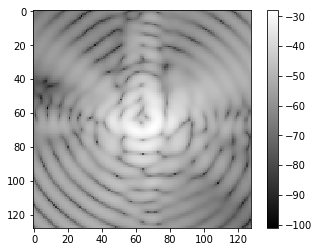

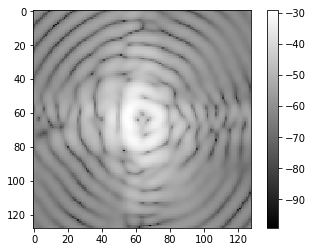

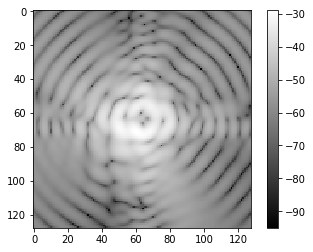

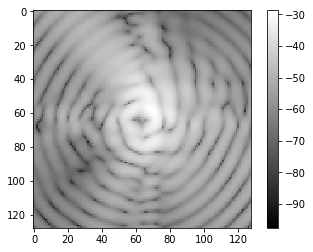

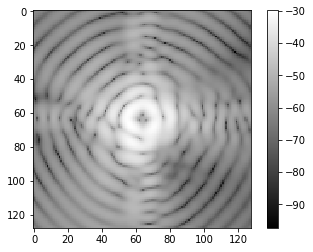

In [5]:
for i in range(5):
    plt.figure()
    plt.imshow(10*np.log10(images[:,:,i]),cmap='gray')
    plt.colorbar()